**Handling imbalanced data in customer churn prediction**

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model. We will then handle imbalance in data using various techniques and improve f1-score

In [73]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [74]:
#The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception)
import warnings
warnings.filterwarnings('ignore')

In [75]:
df = pd.read_csv("/home/milan/Desktop/DeepLearning/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3250,6924-TDGMT,Male,0,Yes,No,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.55,184.95,No
3318,5016-ETTFF,Male,0,No,No,10,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,29.50,255.25,Yes
3722,8328-SKJNO,Male,0,No,Yes,23,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Bank transfer (automatic),40.65,947.4,No
5083,7136-IHZJA,Female,0,Yes,Yes,40,Yes,No,DSL,Yes,...,No,Yes,No,Yes,Month-to-month,Yes,Mailed check,71.35,2847.2,No
2671,4191-XOVOM,Male,0,No,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.2,No


In [76]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [77]:
df.shape

(7043, 21)

In [78]:
df.drop('customerID', axis = 'columns', inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [80]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [81]:
df.TotalCharges.values
#as it is in string we need to convert this into number(float)

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [82]:
#converting to number
#pd.to_numeric(df.TotalCharges)

In [83]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()
#errors = 'coerce' will do conversion of columns whereever u have space it will ignore and put like NA in it..
#isnull() : it will tell us the value is null or not for each of the rows

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [84]:
#place above line in df as an index and return the rows where value is TRUE i.e TotalCharges = ' '(space)
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [85]:
df.shape

(7043, 20)

In [86]:
# so we need to drop this 11 rows....
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [87]:
#to get details of specific row
#where i = int and loc = location
df.iloc[488]
df.iloc[488]['TotalCharges']

' '

In [88]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [89]:
#converting to number
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [90]:
df1.TotalCharges.dtypes

dtype('float64')

**Data Visualization**

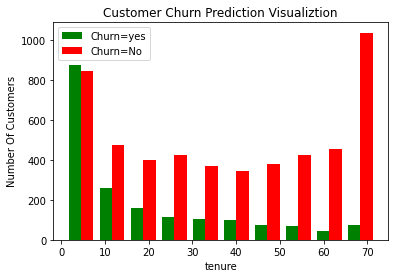

In [91]:
#customer which are not leaving company i.e 'NO'
tenure_churn_no = df1[df1.Churn =='No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

#histogram
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label = ['Churn=yes','Churn=No'])
plt.legend()

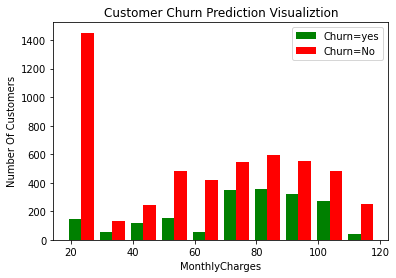

In [92]:
mc_churn_no = df1[df1.Churn =='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

#histogram
plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label = ['Churn=yes','Churn=No'])
plt.legend()

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [94]:
m1 = df1['Churn'] == 'No'

In [95]:
df1[m1]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [96]:
#df1['gender'] = df1['gender'].astype('category')

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [97]:
def print_unique_col_vlaue(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f"{column} : {df[column].unique()}")

In [98]:
print_unique_col_vlaue(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [99]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [100]:
print_unique_col_vlaue(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [101]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [102]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [103]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)
df1.gender.unique()

array([1, 0])

**One hot encoding for categorical columns**

In [104]:
df2 = pd.get_dummies(data = df1, columns = ["InternetService", 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [105]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7012,1,0,1,0,62,1,1,1,1,0,...,1,0,0,0,0,1,0,0,1,0
1650,1,0,0,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4301,0,0,1,1,66,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1106,1,0,0,0,63,1,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4382,1,1,0,0,4,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [106]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [107]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [108]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [109]:
df2[cols_to_scale]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [110]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [111]:
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 5)

In [113]:
x_train.shape

(5625, 26)

In [114]:
x_test.shape

(1407, 26)

In [115]:
x_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [116]:
len(x_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [117]:
from tensorflow_addons import losses

In [118]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [119]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(20, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])


    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    if weights == -1:
        model.fit(x_train, y_train, epochs=100)
    else:
        model.fit(x_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(x_test, y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [120]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5103 - accuracy: 0.7596
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.7931
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8020
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8053
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8044
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8036
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8091
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8098
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8107
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4051 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.8293
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8318
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8309
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8295
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8302
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8300
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8322
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8302
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8304
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 

**Method 1: Undersampling**

In [121]:
#class count
count_class_0, class_count_1 = df.Churn.value_counts()

#divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [122]:
count_class_0

5174

In [123]:
df_class_0.shape

(5163, 27)

In [124]:
df_class_1.shape

(1869, 27)

In [125]:
df_class_0_under = df_class_0.sample(class_count_1)
#1869
df_test_under = pd.concat([df_class_0_under,df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [126]:
x = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)
#where stratify makes sure that you have balanced samples

In [127]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [128]:
len(x_train.value_counts())

2972

In [129]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6554 - accuracy: 0.6057
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7565
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7602
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7706
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7679
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7716
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7749
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8114
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8097
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8080
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8110
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8114
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8104
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8124
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8114
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8157
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8137
Epoch 93/100


In [130]:
#count_class_0, class_count_1 = df.Churn.value_counts()

**Method2: Oversampling**

In [131]:
count_class_0, class_count_1

(5174, 1869)

In [132]:
df_class_1.shape

(1869, 27)

In [133]:
#by oversampling it will make duplicates samples from class 0 
#df_class_1.sample(2000, replace=True).shape
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis= 0)
#df_test_over.shape
print("random over-sampling:")
print(df_test_over.Churn.value_counts())

random over-sampling:
1    5174
0    5163
Name: Churn, dtype: int64


In [134]:
x = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)
#where stratify makes sure that you have balanced samples

In [135]:
y_test.value_counts()

1    1035
0    1033
Name: Churn, dtype: int64

In [136]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5698 - accuracy: 0.7013
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7581
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7622
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7664
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7679
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7706
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7742
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7746
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7781
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4611 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8196
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8180
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8193
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8205
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8192
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8198
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8199
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8197
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8221
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 

**Method3: SMOTE**

In [172]:
#oversampling by producing synthetic samples
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [173]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [174]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [178]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

0        0
1        0
2        1
3        0
4        1
        ..
10321    1
10322    1
10323    1
10324    1
10325    1
Name: Churn, Length: 10326, dtype: int64

In [179]:
y_train.value_counts()

1    4139
0    4130
Name: Churn, dtype: int64

In [180]:
y_test.value_counts()

1    1035
0    1033
Name: Churn, dtype: int64

In [183]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5426 - accuracy: 0.7417
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7552
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4880 - accuracy: 0.7635
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4824 - accuracy: 0.7650
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7668
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7706
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7751
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7742
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7743
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4644 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8238
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3838 - accuracy: 0.8237
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8261
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8259
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8230
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8267
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8239
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8233
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8244
Epoch 90/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3784 - accuracy: 

**Method4: Use of Ensemble with Undersampling**

In [184]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [185]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [186]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [187]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [189]:
4130/3

1376.6666666666667

In [188]:
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

In [190]:
df3 = x_train.copy()
df3['Churn'] = y_train

In [191]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [192]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [193]:
#divide your major class according to minor class
df3_class0[:1495].shape

(1495, 27)

In [195]:
def get_train_batch(df3_majority, df3_minority, start,end):
    df_train = pd.concat([df3_majority[:1495], df3_minority], axis=0)
    #df_train.shape
    x_train = df_train.drop('Churn', axis='columns')
    y_train = df_train['Churn']
    
    return x_train, y_train

In [197]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 0,1495)
#x_train.shape
y_pred1 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.7462
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7592
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7706
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7696
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7696
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7722
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7742
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7756
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7736
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.7766
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8077
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8094
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8060
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8130
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8074
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8107
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4104 - accuracy: 0.8110
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8080
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8117
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8147
Epoch 93/100


In [198]:
x_train, y_train = get_train_batch(df3_class0, df3_class1,1495, 2990)
y_pred2 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.6518
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7458
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7535
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7612
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7666
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7672
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7702
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7719
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8134
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8114
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8110
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8147
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8144
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8147
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8137
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8151
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8151
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8137
Epoch 93/100


In [199]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 2990,4130)
y_pred3 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5977 - accuracy: 0.7157
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5182 - accuracy: 0.7555
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7609
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7632
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7706
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7712
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.7739
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7699
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7716
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7696
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8104
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8137
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8191
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8134
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8184
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8154
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8140
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8154
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.8174
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8140
Epoch 93/100


In [200]:
vote1 = 0
vote2 = 0
vote3 = 1

vote1+vote2+vote3 

1

In [202]:
len(y_pred2)

1407

In [203]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [206]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.79      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

